<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-Variables" data-toc-modified-id="Create-Variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create Variables</a></span></li><li><span><a href="#Category-Encoding" data-toc-modified-id="Category-Encoding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Category Encoding</a></span></li><li><span><a href="#Imputing" data-toc-modified-id="Imputing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imputing</a></span></li><li><span><a href="#Target-Transformation" data-toc-modified-id="Target-Transformation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Target Transformation</a></span></li></ul></div>

In [1]:
# Import needed libraries
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

plt.style.use('fivethirtyeight')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data/listings_cleaned.pkl')

In [2]:
X = df.drop(columns='price',axis=1)
y = df.price

# Create Variables

In [3]:
# Create security_deposit_required boolean feature then drop security_deposit column
list_sec = df['security_deposit']
sd = []
for row in list_sec:
    if pd.isnull(row):
        sd.append(0.0)
    else:
        sd.append(1.0)
df['security_deposit_required'] = sd
df = df.drop('security_deposit',axis=1)

In [4]:
# Create an "Other" Category
cat_rename = ['Boat','Guest suite','Boutique hotel','Tent','Serviced apartment','Castle','Yurt',
              'Vacation home','Treehouse','Hut','Tipi','Earth House','Chalet','In-law',
              'Train','Plane','Island','Cave','Parking Space','Casa particular',
              'Lighthouse','Hostel','Cabin','Camper/RV','Dorm','Villa','Other']
df['property_type'].loc[df['property_type'].isin(cat_rename)] = 'Other'

In [5]:
# Derive new features from the text field 'amenities'
ame = df.amenities.astype('object')
ame_list = ('Internet','Wireless','Kitchen','Free parking','Air conditioning','TV','Pets','Heating')

for am in (ame_list):
    df[am] = ame.str.contains(am)

df = df.drop('amenities',axis=1)

In [6]:
df = df.drop(columns=['zipcode', 'availability_60', 'availability_90'], axis=1)

# Category Encoding

In [7]:
# Turn categorical into column features
features = ['host_response_time','property_type','room_type','bed_type','cancellation_policy']
df = pd.get_dummies(df,columns=features,drop_first=True, dtype='bool')

# Imputing

In [8]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [9]:
missing = missing_values_table(df)

Your selected dataframe has 78 columns and 30854 rows.
There are 8 columns that have missing values.


In [10]:
# Impute missing instances with the median
for col in missing.index:
    try:
        df[col] = df[col].fillna(df[col].median())
    except:
        pass

# Target Transformation

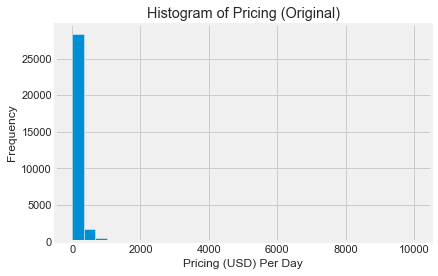

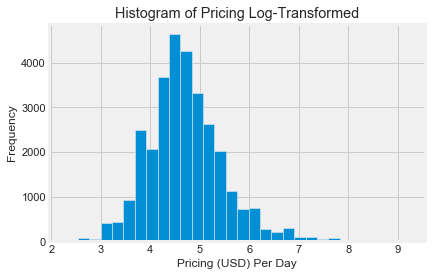

In [11]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

# visualize distribution of price (target variable)
plt.hist(df['price'], bins=30)
plt.title("Histogram of Pricing (Original)")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [12]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,requires_license,instant_bookable,reviews_per_month,security_deposit_required,Internet,Wireless,Kitchen,Free parking,Air conditioning,TV,Pets,Heating,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Plane,property_type_Serviced apartment,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price_log
0,25.0,False,1.0,True,False,10,7.0,5.0,5.0,3000.0,200.0,1,0.0,1,1125,27,352,0,96.0,False,True,1.13,1.0,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,8.006368
1,100.0,True,1.0,True,False,2,1.0,1.0,1.0,50.0,55.0,1,0.0,1,1125,29,350,33,93.0,False,False,1.91,0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,3.912023
2,100.0,True,1.0,True,True,2,1.0,1.0,1.0,55.0,55.0,1,10.0,1,1125,18,348,14,100.0,False,False,1.72,0.0,True,True,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,4.007333
3,100.0,True,1.0,True,False,6,1.0,1.0,3.0,150.0,35.0,1,0.0,1,2,3,87,22,100.0,False,True,2.12,0.0,True,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5.010635
4,100.0,False,1.0,True,True,1,1.0,1.0,1.0,30.0,5.0,1,10.0,1,90,0,0,3,93.0,False,False,0.18,0.0,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,3.401197


In [13]:
df.to_pickle('data/listings_cleaned_processed.pkl')